<a href="https://colab.research.google.com/github/wingated/cs473/blob/main/mini_labs/week_2_catdist.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BYU CS 473 — Categorical Distribution

### IMPORTANT: The assignment portion is in part 6

---

## Learning Goals
- Understand the concept of categorical distribution  
- Understand how to use One-Hot Encoding to sort categorical data  
- Understand how to use multinomial distribution to model categorical data  



## 1. Introduction to Categorical Distribution

The **categorical distribution** describes the probability of a random variable that can take on one of *k* possible categories, with each having its own probability.

- Example: Rolling a 3-sided die (with outcomes `{A, B, C}`).
- Each category has a probability:  
  $P(X = i) = p_i, \quad \text{where } \sum_{i=1}^k p_i = 1$

We often represent the outcome using **One-Hot encoding**.


## 2. One-Hot Encoding

Categorical data is often encoded numerically for machine learning.  
**One-Hot Encoding** represents each category as a binary vector with a `1` in the position of the chosen category.

Example:  
- Categories: `["A", "B", "C"]`  
- Sample outcome: `"B"`  
- One-Hot: `[0, 1, 0]`


In [121]:
# Example: One-hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Example categorical samples
samples = ["A", "B", "C", "A", "B", "C", "A"]

# Reshape to column vector for encoder
X = np.array(samples).reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)
X_encoded


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

## 3. Multinomial Distribution

The **multinomial distribution** extends the categorical distribution to multiple trials.  
- Instead of one outcome, we have `n` trials.  
- The probability of each outcome depends on the categorical probabilities.  

Example: Tossing a 3-sided die 20 times.


In [122]:
# Example: Multinomial distribution with numpy

# Define probability distribution over 3 categories
probs = [0.2, 0.5, 0.3]  # must sum to 1
n_trials = 20
multinomial_sample = np.random.multinomial(n_trials, probs)
multinomial_sample


array([7, 9, 4])

## 4. Visualization of Categorical vs Multinomial Distribution
We can visualize:

1. **Categorical Distribution Simulation** — outcomes from repeated categorical trials.
2. **Multinomial Distribution** — outcome counts over multiple trials.

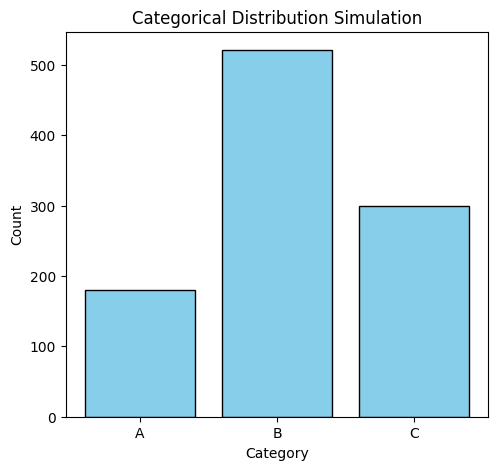

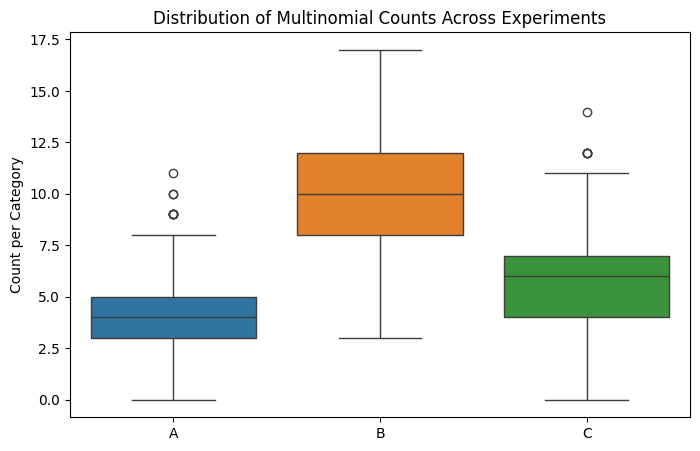

In [123]:
import matplotlib.pyplot as plt

# Define categories and probabilities
categories = ["A", "B", "C"]
probs = [0.2, 0.5, 0.3]

# Parameters
n_trials = 1000
results = np.random.choice(categories, size=n_trials, p=probs)

# Count frequencies (Categorical simulation)
counts = [np.sum(results == c) for c in categories]

# Plot categorical simulation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(categories, counts, color="skyblue", edgecolor="black")
plt.title("Categorical Distribution Simulation")
plt.xlabel("Category")
plt.ylabel("Count")

import seaborn as sns

# Run many multinomial experiments
n_experiments = 500
n_per_experiment = 20
multi_samples = np.random.multinomial(n_per_experiment, probs, size=n_experiments)

# Convert to DataFrame for plotting
import pandas as pd
df = pd.DataFrame(multi_samples, columns=categories)

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df)
plt.title("Distribution of Multinomial Counts Across Experiments")
plt.ylabel("Count per Category")
plt.show()



## 5. Summary

- **Categorical Distribution** models a single trial with multiple categories.  
- **One-Hot Encoding** represents categories numerically.  
- **Multinomial Distribution** generalizes the categorical distribution to multiple trials.  

These concepts are fundamental in probability, statistics, and machine learning when handling categorical data.


# 6. Exercises
### Exercise 1
Create a categorical distribution with 4 categories of your choice and assign probabilities.  
- Sample 20 outcomes.  
- Print the frequency of each category.  

In [124]:
mySamples = ["A", "B", "C", "D"]
freq = [.3, .15, .35, .2]
outcomes = np.random.choice(mySamples, size=20, p=freq)
unique_outcomes, counts = np.unique(outcomes, return_counts=True)

for category, count in zip(unique_outcomes, counts):
    print(f"{category}: {count}")

A: 6
B: 1
C: 8
D: 5


### Exercise 2
Using your sampled outcomes from Exercise 1, perform One-Hot Encoding.  
- Show the first 5 encoded vectors.  


In [125]:
X = np.array(outcomes).reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

print("Sampled outcomes:", outcomes[:5])
print("One-hot encodings (first 5):")
print(X_encoded[:5])

Sampled outcomes: ['C' 'A' 'A' 'C' 'A']
One-hot encodings (first 5):
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


### Exercise 3
Run 100 experiments of 10 trials each using the multinomial distribution.  
- Record the counts.  
- Compare the average counts to the theoretical probabilities.  


In [126]:
n_experiments = 100
trials_per_experiment = 10

samples = np.random.multinomial(trials_per_experiment, freq, size=n_experiments)
avg_counts = samples.mean(axis=0)

print("Average counts across experiments:", avg_counts)
print("Theoretical probabilities:", freq)


Average counts across experiments: [3.12 1.32 3.26 2.3 ]
Theoretical probabilities: [0.3, 0.15, 0.35, 0.2]


### Exercise 4
Plot a histogram showing the distribution of counts for one category (e.g., "B") across multiple multinomial experiments.  
- What shape does the histogram resemble?  
- Why do you think that is?  


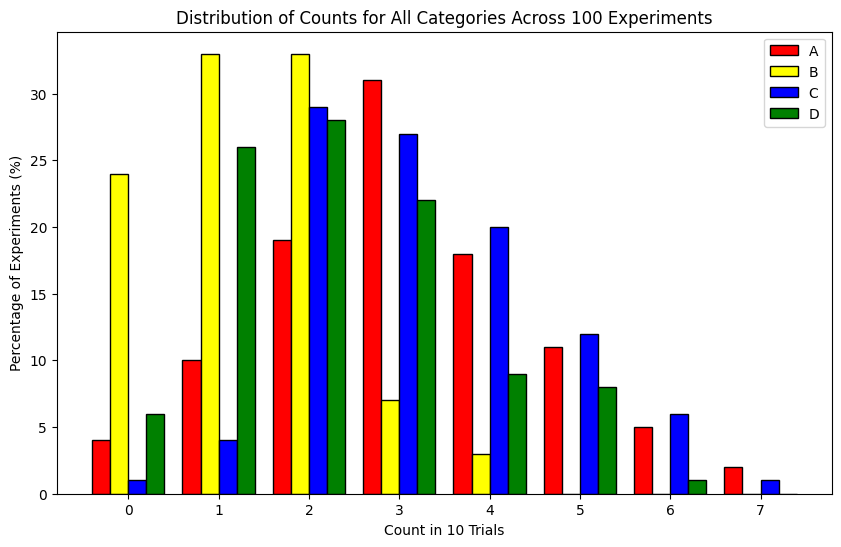

In [127]:
import matplotlib.pyplot as plt

n_categories = len(mySamples)
colors = ['red', 'yellow', 'blue', 'green']

# Get counts for each category
counts_list = [samples[:, i] for i in range(n_categories)]

# Determine the range of counts for x-axis
min_count = 0
max_count = max(samples.flatten())

# Width of each bar
width = 1 / (n_categories + 1)

# x positions for bins
bins = np.arange(min_count, max_count+1)

plt.figure(figsize=(10,6))

for i, counts in enumerate(counts_list):
    # Histogram for this category
    hist, _ = np.histogram(counts, bins=np.arange(min_count, max_count+2)-0.5)
    # Convert frequency to percentage
    hist_percent = (hist / len(samples)) * 100
    # Shift bars to the side for grouping
    plt.bar(bins + i*width, hist_percent, width=width, color=colors[i], label=mySamples[i], edgecolor='black')

plt.title('Distribution of Counts for All Categories Across ' + str(n_experiments) + ' Experiments')
plt.xlabel('Count in ' + str(trials_per_experiment) + ' Trials')
plt.ylabel('Percentage of Experiments (%)')
plt.xticks(bins + width*(n_categories-1)/2, bins)  # Center x-ticks under groups
plt.legend()
plt.show()

They all have a sort of bell shape. They all have their individual peak, with frequency tapering off in each direction, but the peak is different for each value.

My educated guess is that this happens due to the relative frequency. For example, C has a frequency of 35%, so you'd expect it to show up 3 or 4 times in each trial. It's not unexpected for it to show up one time more or less, but as you increase (or decrease) the count, it gets increasingly less expected.

### Exercise 5
Answer in text (2–3 sentences each):

1. How does the categorical distribution differ from the multinomial distribution?  
2. Why is One-Hot encoding important for machine learning models?  
3. If you increased the number of trials in the multinomial distribution, what would happen to the observed frequencies? Why?


1. How does the categorical distribution differ from the multinomial distribution?

Categorical Distribution models a single trial with multiple categories. Multinomial Distribution generalizes the categorical distribution to multiple trials.

2. Why is One-Hot encoding important for machine learning models?

One-Hot Encoding represents each category as a binary vector, which allows it to be used in weight adjusting for ML algorithms. Using other values would, at best, require a more hands-on conversion to be used.

3. If you increased the number of trials in the multinomial distribution, what would happen to the observed frequencies? Why?

The frequencies would increasingly reflect their theoretical probabilities as the sample size increases. Luck plays a big part in any single event, but as sample sizes increase, luck begins to give way to the law of large numbers and patterns of probability.